<a href="https://colab.research.google.com/github/crowetc/Random_Projects/blob/master/IRIS_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Network with the Iris Dataset**

This notebook explores the effects of regularization and callbacks on a Sequential Neural Network coded with tensorflow

The model is trained using the [Iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

In [1]:
# Package Imports

from numpy.random import seed
seed(8)
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection
%matplotlib inline

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [2]:
# Load and preprocess the data

def read_in_and_split_data(iris):
  """
  This function takes the iris dataset as input and splits it so that 10% of 
  the dataset reserved for testing
  """
  iris_data = iris.data
  iris_targets = iris.target
  train_data, test_data, train_targets, test_targets = train_test_split(iris_data, iris_targets, test_size=0.1)
  return (train_data, test_data, train_targets, test_targets)

iris = datasets.load_iris()
train_data, test_data, train_targets, test_targets = read_in_and_split_data(iris)

In [3]:
# Convert targets to a one-hot encoding

train_targets = tf.keras.utils.to_categorical(np.array(train_targets))
test_targets = tf.keras.utils.to_categorical(np.array(test_targets))

In [4]:
# Generate model

def get_model(input_shape):
    """
    This function generates a sequential model without regularizers
    """
    model = Sequential([
        Dense(64, kernel_initializer='he_uniform', bias_initializer=tf.keras.initializers.Constant(value=1.0),
              activation='relu', input_shape=input_shape),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax'),
    ])

    return model

model = get_model(train_data[0].shape)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4

In [5]:
# Compile model

def compile_model(model):
    """
    This function compiles the model
    """
    opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
    lss = tf.keras.losses.CategoricalCrossentropy()
    acc = tf.keras.metrics.CategoricalAccuracy()
    model.compile(optimizer=opt, loss=lss, metrics=[acc])

compile_model(model)  

In [6]:
# Train model

def train_model(model, train_data, train_targets, epochs):
  """
  This function trains the model with 15% of the training set reserved for validation
  """
  history = model.fit(train_data,train_targets, epochs=epochs,
                      validation_split=0.15, batch_size=64, verbose=False)
  
  return history

history = train_model(model, train_data, train_targets, epochs=100)

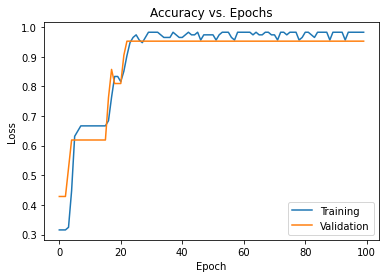

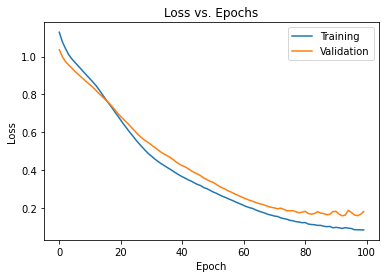

In [7]:
# Plot learning curves

# Accuracy vs Epochs
try:
    plt.plot(history.history['categorical_accuracy'])
    plt.plot(history.history['val_categorical_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

# Loss vs Epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [8]:
# Build Regularized Model

def get_regularised_model(input_shape, dropout_rate, weight_decay):
  """
  This function updates the previous 'get_model' function with L2 weight decay,
  batch normatlization and dropout
  """
  reg_model = Sequential([
        Dense(64, kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(weight_decay),
              bias_initializer=tf.keras.initializers.Constant(value=1.0),
              activation='relu', input_shape=input_shape),
        Dense(128, kernel_regularizer=regularizers.l2(weight_decay), activation='relu'),
        Dense(128, kernel_regularizer=regularizers.l2(weight_decay), activation='relu'),
        Dropout(dropout_rate),
        Dense(128, kernel_regularizer=regularizers.l2(weight_decay), activation='relu'),
        Dense(128, kernel_regularizer=regularizers.l2(weight_decay), activation='relu'),
        BatchNormalization(),
        Dense(64, kernel_regularizer=regularizers.l2(weight_decay), activation='relu'),
        Dense(64, kernel_regularizer=regularizers.l2(weight_decay), activation='relu'),
        Dropout(dropout_rate),
        Dense(64, kernel_regularizer=regularizers.l2(weight_decay), activation='relu'),
        Dense(64, kernel_regularizer=regularizers.l2(weight_decay), activation='relu'),
        Dense(3, activation='softmax'),
    ])
  
  return reg_model

reg_model = get_regularised_model(train_data[0].shape, 0.3, 0.001)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4

In [9]:
# Compile and train regularized model

compile_model(reg_model)
reg_history = train_model(reg_model, train_data, train_targets, epochs=800)

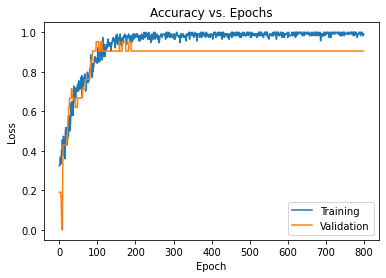

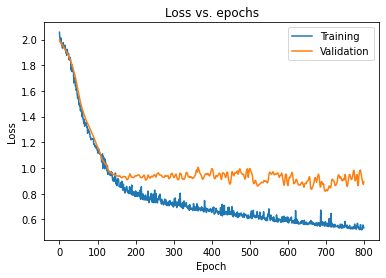

In [10]:
# Plot regularized learning curves

# Accuracy vs Epochs
try:
    plt.plot(reg_history.history['categorical_accuracy'])
    plt.plot(reg_history.history['val_categorical_accuracy'])
except KeyError:
    plt.plot(reg_history.history['acc'])
    plt.plot(reg_history.history['val_acc'])
plt.title('Accuracy vs. Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

# Loss vs Epochs
plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [11]:
# Implement early stopping and learning rate reduction callbacks

def get_callbacks():
  """
  This function creates callbacks for early stopping and learning rate reduction
  """
  early_stopping = EarlyStopping(
    monitor='val_loss', min_delta=0, patience=30, verbose=0, mode='min',
  )

  learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_loss', factor=0.12, patience=20, verbose=0, mode='auto',
    min_delta=0.0001, cooldown=0, min_lr=0,
  )

  return (early_stopping, learning_rate_reduction)

In [12]:
# Get regularized model with callbacks

call_model = get_regularised_model(train_data[0].shape, 0.3, 0.0001)
call_model.summary
compile_model(call_model)
early_stopping, learning_rate_reduction = get_callbacks()
call_history = call_model.fit(train_data, train_targets, epochs=800, validation_split=0.15,
                         callbacks=[early_stopping, learning_rate_reduction], verbose=0)

learning_rate_reduction.patience

20

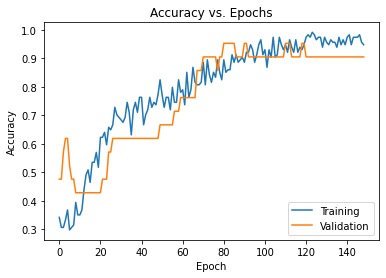

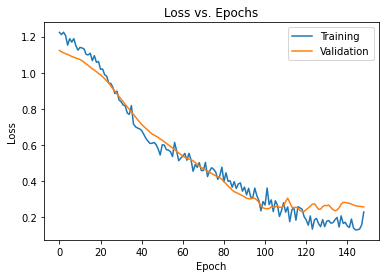

In [13]:
# Plot Learning Curves with callbacks

# Accuracy vs Epochs
try:
    plt.plot(call_history.history['categorical_accuracy'])
    plt.plot(call_history.history['val_categorical_accuracy'])
except KeyError:
    plt.plot(call_history.history['acc'])
    plt.plot(call_history.history['val_acc'])
plt.title('Accuracy vs. Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

# Loss vs Epochs
plt.plot(call_history.history['loss'])
plt.plot(call_history.history['val_loss'])
plt.title('Loss vs. Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [14]:
# Evaluate Model

test_loss, test_acc = call_model.evaluate(test_data, test_targets, verbose=0)
print("Test loss: {:.3f}\nTest accuracy: {:.2f}%".format(test_loss, 100 * test_acc))

Test loss: 0.123
Test accuracy: 100.00%
